In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing # for encoders and scalers
import opendatasets as od

In [2]:
od.download("https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  sumitk87549


Your Kaggle Key:

  ········


100%|██████████| 99.5k/99.5k [00:00<00:00, 157kB/s]

In [3]:
df_raw = pd.read_csv("telecom-churn-datasets/churn-bigml-80.csv", encoding="ISO-8859-1")
df_raw.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [8]:
encoder = preprocessing.LabelEncoder()
df_raw[['International plan','Voice mail plan','State']] = df_raw[['International plan','Voice mail plan','State']].apply(encoder.fit_transform)
df_raw.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
df_raw.State.unique()

array([16, 35, 31, 36,  1, 19, 24, 49, 39, 12, 26, 13, 46, 45, 43,  9,  5,
        3, 29, 50, 14, 30, 18, 10,  0, 20,  2, 48, 37,  8, 15, 44,  4, 41,
       27, 47, 23, 32, 33,  7, 34, 17, 21, 25, 22, 40, 42, 38, 11, 28,  6])

In [10]:
df_raw.Churn = encoder.fit_transform(df_raw.Churn)

In [12]:
df_raw.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [14]:
npx = df_raw.drop(columns=['Churn'], inplace=False).to_numpy()
npx[0:7]

array([[ 16.  , 128.  , 415.  ,   0.  ,   1.  ,  25.  , 265.1 , 110.  ,
         45.07, 197.4 ,  99.  ,  16.78, 244.7 ,  91.  ,  11.01,  10.  ,
          3.  ,   2.7 ,   1.  ],
       [ 35.  , 107.  , 415.  ,   0.  ,   1.  ,  26.  , 161.6 , 123.  ,
         27.47, 195.5 , 103.  ,  16.62, 254.4 , 103.  ,  11.45,  13.7 ,
          3.  ,   3.7 ,   1.  ],
       [ 31.  , 137.  , 415.  ,   0.  ,   0.  ,   0.  , 243.4 , 114.  ,
         41.38, 121.2 , 110.  ,  10.3 , 162.6 , 104.  ,   7.32,  12.2 ,
          5.  ,   3.29,   0.  ],
       [ 35.  ,  84.  , 408.  ,   1.  ,   0.  ,   0.  , 299.4 ,  71.  ,
         50.9 ,  61.9 ,  88.  ,   5.26, 196.9 ,  89.  ,   8.86,   6.6 ,
          7.  ,   1.78,   2.  ],
       [ 36.  ,  75.  , 415.  ,   1.  ,   0.  ,   0.  , 166.7 , 113.  ,
         28.34, 148.3 , 122.  ,  12.61, 186.9 , 121.  ,   8.41,  10.1 ,
          3.  ,   2.73,   3.  ],
       [  1.  , 118.  , 510.  ,   1.  ,   0.  ,   0.  , 223.4 ,  98.  ,
         37.98, 220.6 , 101.  ,  18.75, 203

In [15]:
npy = np.asarray(df_raw.Churn)

In [16]:
npx = preprocessing.StandardScaler().fit_transform(npx)
npx[0:5]

array([[-0.67270017,  0.69216332, -0.52781119, -0.33569005,  1.62391742,
         1.24750838,  1.57966959,  0.48486775,  1.57994234, -0.05861885,
        -0.05078123, -0.05844549,  0.85740344, -0.46903104,  0.85670695,
        -0.0850203 , -0.59752673, -0.08568137, -0.42917241],
       [ 0.60084425,  0.16127783, -0.52781119, -0.33569005,  1.62391742,
         1.32098526, -0.32991809,  1.13537472, -0.3301935 , -0.0959162 ,
         0.14765447, -0.09539655,  1.04845815,  0.14905361,  1.04929318,
         1.24217895, -0.59752673,  1.24292063, -0.42917241],
       [ 0.33272963,  0.91968567, -0.52781119, -0.33569005, -0.61579486,
        -0.58941354,  1.17930193,  0.68502374,  1.179465  , -1.55443885,
         0.49491694, -1.55496337, -0.75966782,  0.20056066, -0.75839118,
         0.7041252 ,  0.21689365,  0.69819381, -1.19195484],
       [ 0.60084425, -0.42016819, -0.69246654,  2.97893841, -0.61579486,
        -0.58941354,  2.21250879, -1.46665316,  2.21267484, -2.71850874,
        -0.596

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(npx, npy, train_size=0.8, random_state=69)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2132, 19), (534, 19), (2132,), (534,))

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,jaccard_score

lr = LogisticRegression(C=0.01, solver='liblinear').fit(x_train, y_train)
y_prob = lr.predict_proba(x_test)
y_hat = lr.predict(x_test)

In [21]:
jaccard_score(y_test, y_hat, pos_label=0)

0.8514285714285714

In [22]:
jaccard_score(y_test, y_hat, pos_label=1)

0.10344827586206896

In [25]:
from sklearn.metrics import classification_report
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt='.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print( confusion_matrix(y_test, y_hat, labels=[1,0]))

[[  9  71]
 [  7 447]]


Confusion matrix, without normalization
[[  9  71]
 [  7 447]]


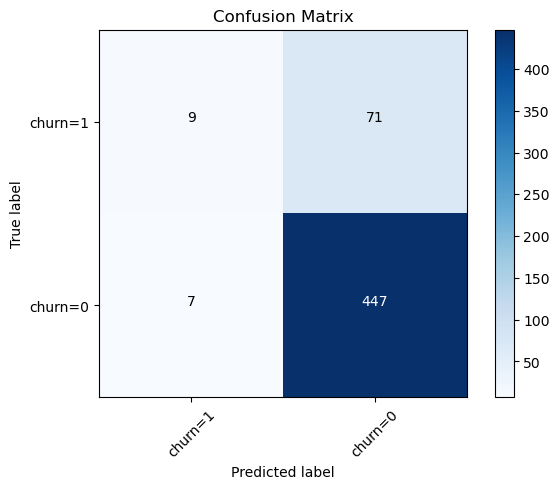

In [26]:
cmatrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cmatrix, classes=['churn=1','churn=0'])

In [28]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       454
           1       0.56      0.11      0.19        80

    accuracy                           0.85       534
   macro avg       0.71      0.55      0.55       534
weighted avg       0.82      0.85      0.81       534



In [31]:
from sklearn.metrics import log_loss
print(log_loss(y_test, y_prob))

0.3586383383121334
